In [1]:
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
from latexify import *
%matplotlib inline
import matplotlib.patches as mpatches

In [2]:
x = np.array([0, 0.1, 0.2, 0.3, 0.6, 0.7, 0.9])

In [3]:
y = (x>0.4).astype('int')

In [4]:
y

array([0, 0, 0, 0, 1, 1, 1])

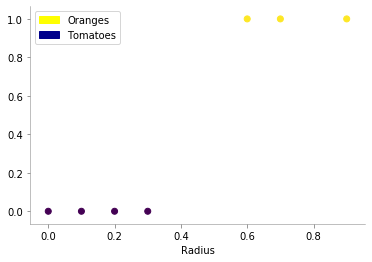

In [5]:
#latexify()
plt.scatter(x, y, c=y)
yellow_patch = mpatches.Patch(color='yellow', label='Oranges')
blue_patch = mpatches.Patch(color='darkblue', label='Tomatoes')
plt.legend(handles=[yellow_patch, blue_patch])

plt.xlabel('Radius')
format_axes(plt.gca())

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
clf = LogisticRegression(penalty='none', solver='lbfgs')

In [8]:
clf.fit(x.reshape(-1,1), y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
clf.coef_

array([[55.99493009]])

In [10]:
clf.intercept_

array([-25.11119514])

In [11]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

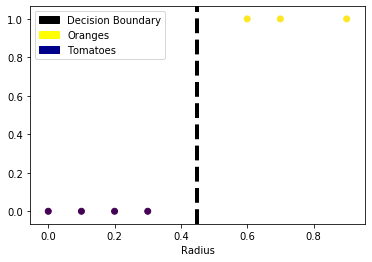

In [12]:
#latexify()
plt.scatter(x, y, c=y)
yellow_patch = mpatches.Patch(color='yellow', label='Oranges')
blue_patch = mpatches.Patch(color='darkblue', label='Tomatoes')
black_patch = mpatches.Patch(color='black', label='Decision Boundary')
plt.axvline(-clf.intercept_[0]/clf.coef_[0],label='Decision Boundary',linestyle='--',color='k',lw=4)
plt.xlabel('Radius')
plt.legend(handles=[black_patch, yellow_patch, blue_patch])

Text(0.5, 1.0, 'Logistic Regression')

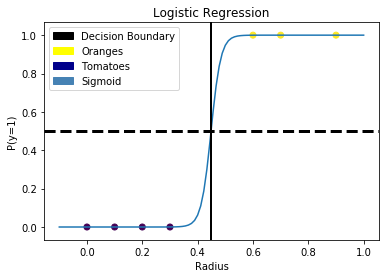

In [13]:
x_dum = np.linspace(-0.1, 1, 100)
plt.plot(x_dum, sigmoid(x_dum*clf.coef_[0] + clf.intercept_[0]))
plt.scatter(x, y, c=y)
#latexify()
plt.axvline(-clf.intercept_[0]/clf.coef_[0], lw=2, color='black')
plt.axhline(0.5, linestyle='--',color='k',lw=3, label='P(y=1) = P(y=0)')
plt.ylabel("P(y=1)")
plt.xlabel('Radius')
yellow_patch = mpatches.Patch(color='yellow', label='Oranges')
blue_patch = mpatches.Patch(color='darkblue', label='Tomatoes')
black_patch = mpatches.Patch(color='black', label='Decision Boundary')
sigmoid_patch = mpatches.Patch(color='steelblue', label='Sigmoid')
plt.legend(handles=[black_patch, yellow_patch, blue_patch, sigmoid_patch])
plt.title("Logistic Regression")
